In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import tensorflow.keras.backend as K
from PIL import Image
import os
import glob
import numpy as np

In [24]:
# 展示输入数据
def print_result(path):
    name_list = glob.glob(path)
    fig = plt.figure(figsize=(12, 16))
    for i in range(3):
        img = Image.open(name_list[i])
        sub_img = fig.add_subplot(131+i)
        sub_img.imshow(img)

In [25]:
img_path = 'G:\data_augration\in_path\cats\*'
in_path = 'G:\data_augration\in_path'
out_path = 'G:\data_augration\output'
name_list = glob.glob(img_path)
name_list

['G:\\data_augration\\in_path\\cats\\cat.10.jpg',
 'G:\\data_augration\\in_path\\cats\\cat.11.jpg',
 'G:\\data_augration\\in_path\\cats\\cat.9.jpg']

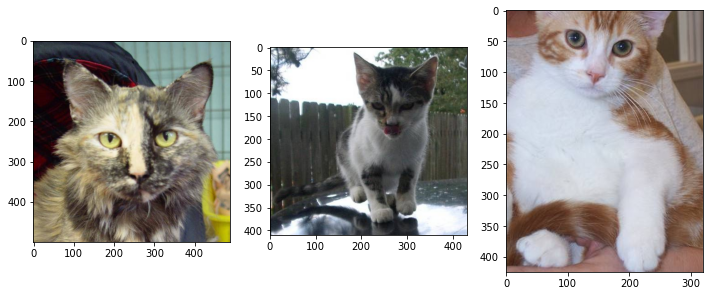

In [26]:
print_result(img_path)

In [27]:
# 指定target_size后所有图像都会变成相同大小
datagen = image.ImageDataGenerator()
gen_img = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_to_dir=out_path+'\\resize',
    save_prefix='gen',
    target_size=(224, 224))
# 构造生成器之后不会立刻生成图片， 需要执行以下代码才会调用生成程序
for i in range(len(gen_img)):
    gen_img.next()

Found 3 images belonging to 1 classes.


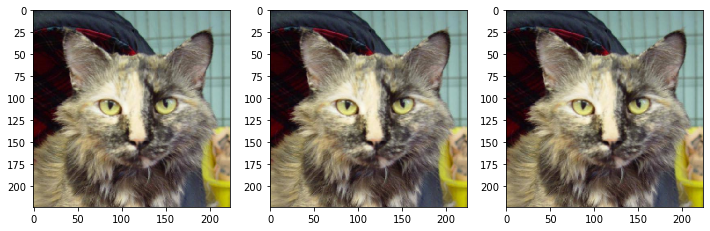

In [28]:
print_result(out_path+'\\resize\\*')

In [29]:
### 角度旋转
datagen = image.ImageDataGenerator(rotation_range=45)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
rotation_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\rotation_range',
    target_size=(224, 224))
for _ in range(len(rotation_data)):
    rotation_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


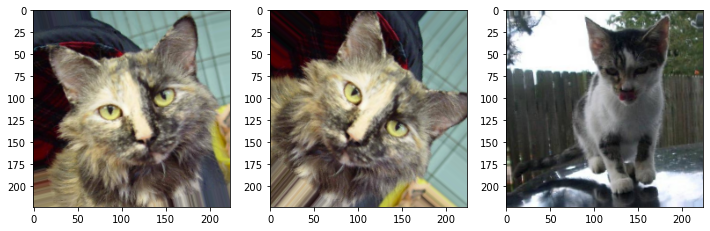

In [30]:
print_result(out_path + '\\rotation_range\\*')

In [36]:
### 平移变换
datagen = image.ImageDataGenerator(width_shift_range=-0.3, height_shift_range=0.3)  # 取值范围+-1
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
move_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\shift',
    target_size=(224, 224))
for _ in range(len(move_data)):
    move_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


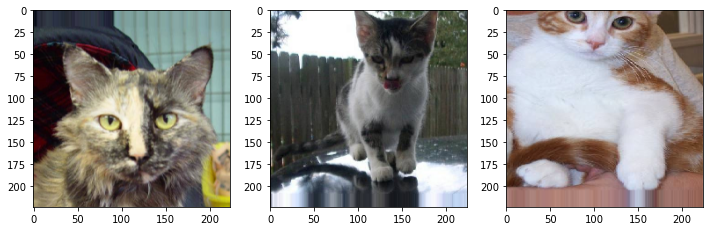

In [37]:
print_result(out_path + '\\shift\\*')

In [41]:
### 缩放
### 平移变换
datagen = image.ImageDataGenerator(zoom_range=10)  # 0-1之间表示对图像放大， >1 表示图像缩小
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
zoom_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\zoom',
    target_size=(224, 224))
for _ in range(len(zoom_data)):
    zoom_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


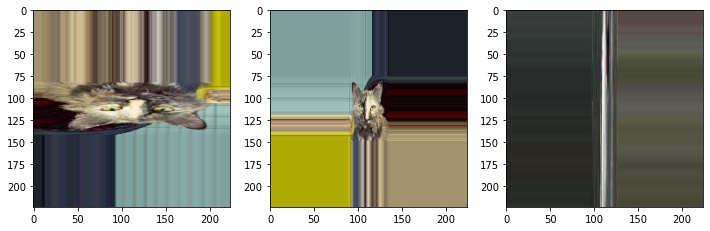

In [42]:
print_result(out_path + '\\zoom\\*')

In [45]:
### channel_shift  修改颜色通道
datagen = image.ImageDataGenerator(channel_shift_range=100)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
channel_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\channel',
    target_size=(224, 224))
for _ in range(len(channel_data)):
    channel_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


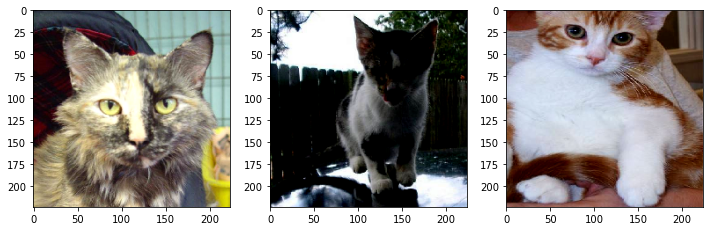

In [46]:
print_result(out_path + '\\channel\\*')

In [47]:
### 翻转
datagen = image.ImageDataGenerator(horizontal_flip=True)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
horizontal_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\horizontal',
    target_size=(224, 224))
for _ in range(len(horizontal_data)):
    horizontal_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


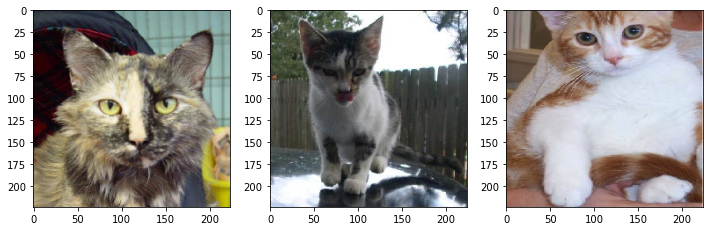

In [48]:
print_result(out_path + '\\horizontal\\*')

In [52]:
### rescale 对像素点做归一化处理
### 翻转
datagen = image.ImageDataGenerator(rescale=1/255.)
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
rescale_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    # save_to_dir=out_path + '\\rescale',
    target_size=(224, 224))
rescale_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


(array([[[[0.1137255 , 0.12941177, 0.16470589],
          [0.07450981, 0.09019608, 0.1254902 ],
          [0.03137255, 0.04705883, 0.09019608],
          ...,
          [0.50980395, 0.63529414, 0.62352943],
          [0.5019608 , 0.627451  , 0.6156863 ],
          [0.4901961 , 0.6156863 , 0.6039216 ]],
 
         [[0.14117648, 0.15686275, 0.19215688],
          [0.16078432, 0.1764706 , 0.21176472],
          [0.12156864, 0.13725491, 0.18039216],
          ...,
          [0.5137255 , 0.6392157 , 0.627451  ],
          [0.5058824 , 0.6313726 , 0.61960787],
          [0.49411768, 0.61960787, 0.60784316]],
 
         [[0.14901961, 0.1764706 , 0.20000002],
          [0.16078432, 0.18823531, 0.21176472],
          [0.14509805, 0.17254902, 0.20392159],
          ...,
          [0.5176471 , 0.6431373 , 0.6313726 ],
          [0.5058824 , 0.6313726 , 0.61960787],
          [0.49803925, 0.62352943, 0.6117647 ]],
 
         ...,
 
         [[0.69803923, 0.64705884, 0.47058827],
          [0.67058

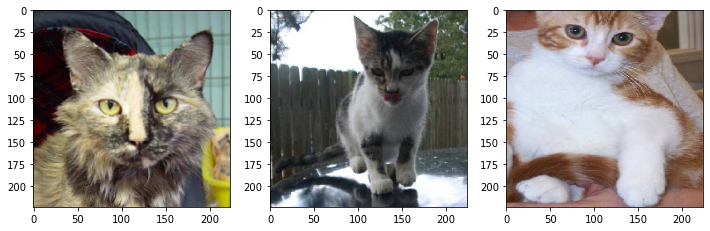

In [53]:
print_result(out_path + '\\rescale\\*')

In [56]:
### 填充方法
# 'constant': kkkkk|abcd|kkkkk
# 'nearest': aaaaa|abcd|ddddd
# 'reflect': abcddcba|abcd|dcbaabcd
# 'wrap': abcdabcd|abcd|abcdabcd

datagen = image.ImageDataGenerator(fill_mode='reflect', zoom_range=[4, 4])
gen = image.ImageDataGenerator()
data = gen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    class_mode=None,
    target_size=(224, 224))
np_data = np.concatenate([data.next() for i in range(data.n)])
datagen.fit(np_data)
fill_data = datagen.flow_from_directory(
    in_path,
    batch_size=1,
    shuffle=False,
    save_prefix='gen',
    save_to_dir=out_path + '\\fill',
    target_size=(224, 224))
for _ in range(len(fill_data)):
    fill_data.next()

Found 3 images belonging to 1 classes.
Found 3 images belonging to 1 classes.


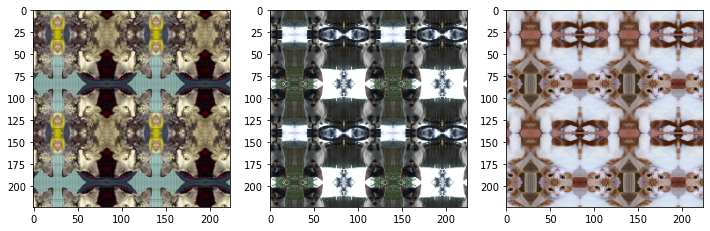

In [57]:
print_result(out_path + '\\fill\\*')